
### Raport z analizy i modelowania wybranego zbioru danych
Język programowania – Python
##### autor: Artur Karpiński

In [1]:
# Cel badań - przewidywanie zdarzeń chorobowych serca ze względu na zmienną HeartDisease
# HeartDisease  określa stan chorobowy (mediana z danych czterech szpitali) - w skali od 0 (zdrowy) do 1 (chory)

# Metoda badań: klasyfikacja (binarna) - metoda k-najbliższych sąsiadów
# potem porównanie wyników z drzewami decyzyjnymi i lasami losowymi

%config Completer.use_jedi = False

In [2]:
#ładowanie niezbędnych pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# wczytanie zbioru danych (źródło - https://www.kaggle.com/)
heart = pd.read_csv("dane/heart.csv", comment="#")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#zbadajmy rozkład liczności klas
ile = heart["HeartDisease"].value_counts()
print(ile)
ile.iloc[np.argsort(ile.index)] #sortowanie

1    508
0    410
Name: HeartDisease, dtype: int64


0    410
1    508
Name: HeartDisease, dtype: int64

In [5]:
#dodanie kolumny diagnosis dla poprawy czytelności HeartDisease 
heart["diagnosis"] = pd.cut(heart["HeartDisease"], [0, 1, 2], right=False, labels=["zdrowy", "chory"])
heart["diagnosis"].value_counts()

chory     508
zdrowy    410
Name: diagnosis, dtype: int64

In [6]:
heart.dtypes.diagnosis

CategoricalDtype(categories=['zdrowy', 'chory'], ordered=True)

In [7]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,diagnosis
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,zdrowy
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,chory
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,zdrowy
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,chory
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,zdrowy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,chory
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,chory
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,chory
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,chory


In [8]:
#sprawdzamy typy danych
heart.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
diagnosis         category
dtype: object

In [9]:
#zmiana typów danych

#Pierwszy sposób
#Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope są typu object
#musimy je zmienić kolejno na zmienne typu string

#heart.Sex = heart.Sex.astype("string")
#heart.ChestPainType = heart.ChestPainType.astype("string")
#heart.RestingECG = heart.RestingECG.astype("string")
#heart.ExerciseAngina = heart.ExerciseAngina.astype("string")
#heart.ST_Slope = heart.ST_Slope.astype("string")

#heart.dtypes

#Drugi sposób
#Zamieniamy od razu wszystkie definiując zmienną string_col

string_col = heart.select_dtypes(include="object").columns
heart[string_col] = heart[string_col].astype("string")

heart.dtypes

Age                  int64
Sex                 string
ChestPainType       string
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG          string
MaxHR                int64
ExerciseAngina      string
Oldpeak            float64
ST_Slope            string
HeartDisease         int64
diagnosis         category
dtype: object

In [10]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,diagnosis
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,zdrowy
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,chory
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,zdrowy
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,chory
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,zdrowy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,chory
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,chory
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,chory
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,chory


In [11]:
#przygotowujemy dane do analizy z 6 wybranych kolumn
#wiek, ciśnienie, cholesterol, poziom cukru [1: BS > 120 mg/dl, 0: inaczej]), tętno
X = heart.iloc[:, [0,3,4,5,7,9]]
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [12]:
y = heart["diagnosis"]
y[0:30]

0     zdrowy
1      chory
2     zdrowy
3      chory
4     zdrowy
5     zdrowy
6     zdrowy
7     zdrowy
8      chory
9     zdrowy
10    zdrowy
11     chory
12    zdrowy
13     chory
14    zdrowy
15    zdrowy
16     chory
17    zdrowy
18     chory
19     chory
20    zdrowy
21    zdrowy
22    zdrowy
23     chory
24    zdrowy
25    zdrowy
26    zdrowy
27    zdrowy
28    zdrowy
29    zdrowy
Name: diagnosis, dtype: category
Categories (2, object): ['zdrowy' < 'chory']

In [13]:
#skoro mamy do czynienia z klasyfikacją binarną ("zdrowy" - "chory") - y(i) należy do zbioru {0,1}
#to warto przekodować wartości zmiennej kategorycznej y na zbiór liczb całkowitych
yk = y.cat.codes.values
yk[0:30]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0], dtype=int8)

In [14]:
#kilka kodów badań wybranych losowo
i = np.random.choice(np.arange(len(yk)), 10, replace=False)
yk[i]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [15]:
y[i].values

['zdrowy', 'chory', 'chory', 'zdrowy', 'zdrowy', 'chory', 'zdrowy', 'zdrowy', 'zdrowy', 'zdrowy']
Categories (2, object): ['zdrowy' < 'chory']

In [16]:
#Podział zbioru na próbę uczącą i testową
import sklearn.model_selection
np.arange(4)
#np.arange(X.shape[0])

array([0, 1, 2, 3])

In [17]:
X.shape[0]

918

In [18]:
#wybór indeksów do zbioru treningowego i testowego (funkcja train_test_split)
idx_ucz, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]),
                                                             test_size=0.2,
                                                             random_state=12345)
X_ucz, X_test = X.iloc[idx_ucz, :], X.iloc[idx_test, :]
y_ucz, y_test = y[idx_ucz], y[idx_test]
yk_ucz, yk_test = yk[idx_ucz], yk[idx_test]
X_ucz.shape, X_test.shape, y_ucz.shape, y_test.shape

((734, 6), (184, 6), (734,), (184,))

In [19]:
y_ucz.value_counts()

chory     411
zdrowy    323
Name: diagnosis, dtype: int64

In [20]:
323/(323+411)

0.44005449591280654

In [21]:
y_test.value_counts()

chory     97
zdrowy    87
Name: diagnosis, dtype: int64

In [22]:
87/(87+97)

#podział na zbiorze testowym trochę odbiega od uczącego, ale do zaakceptowania

0.47282608695652173

In [23]:
#metoda k-najbliższych sąsiadów
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_ucz, yk_ucz)

KNeighborsClassifier()

In [24]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [25]:
#dla przetestowania skuteczności modelu
#wybieram zbiór przykładowych elementów zbioru testowego
yk_pred = knn.predict(X_test)
yk_pred[[0, 30, 60, 90, 120, 150]]

array([0, 1, 0, 0, 1, 0], dtype=int8)

In [26]:
#zbiór za pomocą etykiet
k_pred = y.cat.categories[yk_pred]
k_pred[[0, 30, 60, 90, 120, 150]]

Index(['zdrowy', 'chory', 'zdrowy', 'zdrowy', 'chory', 'zdrowy'], dtype='object')

In [27]:
#przykładowe elementy ze zbioru testowego
y_test.values[[0, 30, 60, 90, 120, 150]]

#zgadzają się z oryginalnymi, więc wszystko jest dobrze

['chory', 'chory', 'zdrowy', 'chory', 'chory', 'zdrowy']
Categories (2, object): ['zdrowy' < 'chory']

In [28]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [29]:
yk_pred_ucz = knn.predict(X_ucz)

In [30]:
yk_pred = knn.predict(X_test)

In [31]:
import sklearn.metrics
sklearn.metrics.accuracy_score(yk_test, yk_pred)

0.7282608695652174

In [32]:
#inny sposób
knn.score(X_test, yk_test)

0.7282608695652174

In [33]:
sklearn.metrics.accuracy_score(yk_ucz, yk_pred_ucz)

0.779291553133515

In [34]:
sklearn.metrics.accuracy_score(yk_test, yk_pred)

0.7282608695652174

In [35]:
#macierz pomyłek [[true negative, false positive], [false negative, true positive]]
sklearn.metrics.confusion_matrix(yk_test, yk_pred)

array([[52, 35],
       [15, 82]], dtype=int64)

In [36]:
y_test.value_counts()

chory     97
zdrowy    87
Name: diagnosis, dtype: int64

In [37]:
from sklearn.metrics import plot_confusion_matrix

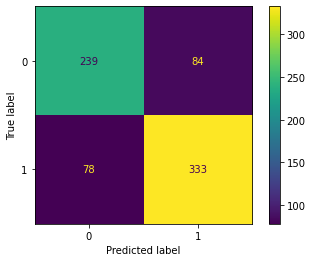

In [38]:
plot_confusion_matrix(knn, X_ucz, yk_ucz)
plt.show()

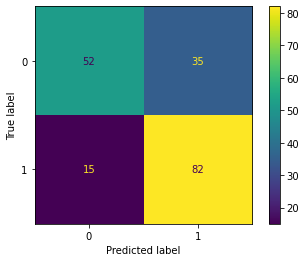

In [39]:
plot_confusion_matrix(knn, X_test, yk_test)
plt.show()

In [40]:
#Metoda trenująca wybrany model alg na zbiorze uczącym (X_ucz, y_ucz), 
#dokonująca predykcji na zbiorze testowym (X_test, y_test)
#walidująca go poprzez cztery wybrane metryki: accuracy, precision, recall i F1
#(ACC, P, R i F1)

def fit_classifier(alg, X_ucz, X_test, y_ucz, y_test):
    alg.fit(X_ucz, y_ucz)
    y_pred = alg.predict(X_test)
    return {
        "ACC": sklearn.metrics.accuracy_score(y_pred, y_test),
        "P":   sklearn.metrics.precision_score(y_pred, y_test),
        "R":   sklearn.metrics.recall_score(y_pred, y_test),
        "F1":  sklearn.metrics.f1_score(y_pred, y_test)
    }

In [41]:
#stosujemy funkcję fit_classifier dla metryk
pd.Series(fit_classifier(sklearn.neighbors.KNeighborsClassifier(),
                        X_ucz, X_test, yk_ucz, yk_test))

ACC    0.728261
P      0.845361
R      0.700855
F1     0.766355
dtype: float64

In [42]:
#tworzymy ramkę danych
params = ["knn"]
res = [fit_classifier(sklearn.neighbors.KNeighborsClassifier(),
                      X_ucz,X_test, yk_ucz, yk_test)]
pd.DataFrame(res, index=params)

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355


In [43]:
df_results = pd.DataFrame(res, index=params)

In [44]:
df_results

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355


In [45]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [46]:
#sprawdzamy wyniki dla danych po standaryzacji
m = X.mean()
s = X.std()

In [47]:
X_ucz_std = (X_ucz - m)/s
X_test_std = (X_test - m)/s

In [48]:
X_ucz_std.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,0.002167,0.000218,0.001185,-0.000344,0.029427,0.010826
std,1.010287,1.016749,0.991235,0.999919,0.993541,1.006347
min,-2.704540,-7.151097,-1.817444,-0.551041,-3.016825,-3.269699
25%,-0.690253,-0.669570,-0.242719,-0.551041,-0.660218,-0.831979
50%,0.051853,-0.129442,0.221243,-0.551041,0.125318,-0.269428
75%,0.687943,0.410685,0.623495,-0.551041,0.753746,0.574398
max,2.490201,3.651449,3.338696,1.812770,2.560478,4.981047


In [49]:
params.append("knn_std")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(),
                          X_ucz_std, X_test_std, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [50]:
df_results

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325


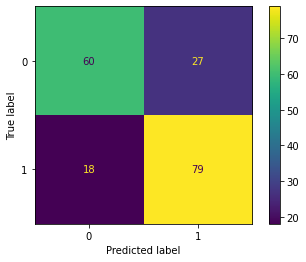

In [51]:
#macierz pomyłek
knn.fit(X_ucz_std, yk_ucz)
knn.predict(X_test_std)

plot_confusion_matrix(knn, X_test_std, yk_test)
plt.show()

In [52]:
yk_pred_test = knn.predict(X_test_std)

In [53]:
print(sklearn.metrics.classification_report(yk_test, yk_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        87
           1       0.75      0.81      0.78        97

    accuracy                           0.76       184
   macro avg       0.76      0.75      0.75       184
weighted avg       0.76      0.76      0.75       184



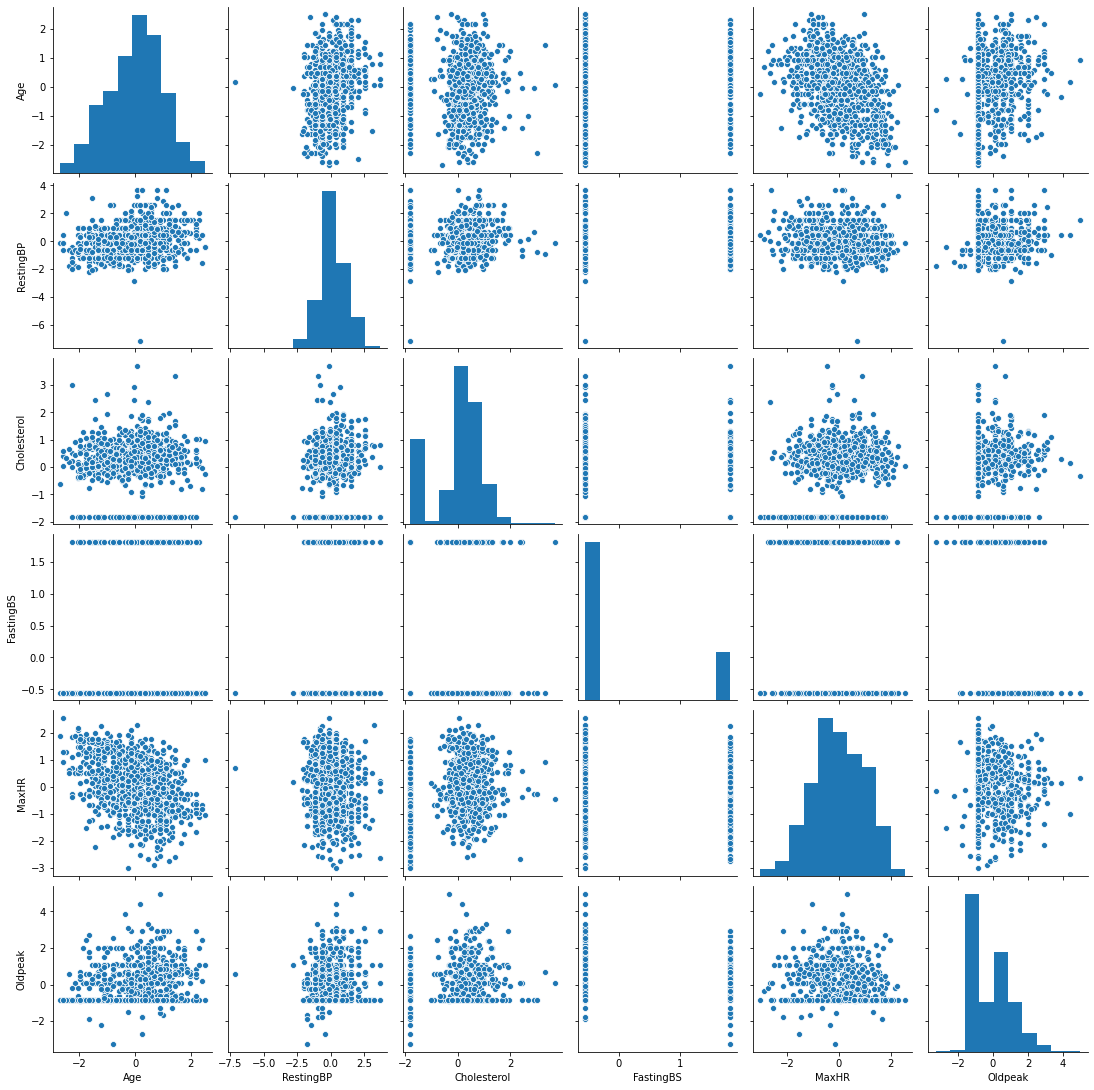

In [54]:
X_std = (X-m)/s
sns.pairplot(X_std)
plt.show()

In [55]:
from sklearn.ensemble import IsolationForest

In [56]:
# fit the model
clf = IsolationForest(random_state=12345)
clf.fit(X)
isf_pred = clf.predict(X)

In [57]:
len(isf_pred[isf_pred == 1])

701

In [58]:
len(isf_pred[isf_pred == -1])

217

In [59]:
print(X.shape)
len(isf_pred)

(918, 6)


918

In [60]:
X_wout_outl = X[isf_pred == 1]

In [61]:
X_wout_outl

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
912,57,140,241,0,123,0.2
913,45,110,264,0,132,1.2
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [62]:
yk_wout_outl = yk[isf_pred == 1]

In [63]:
len(yk_wout_outl)

701

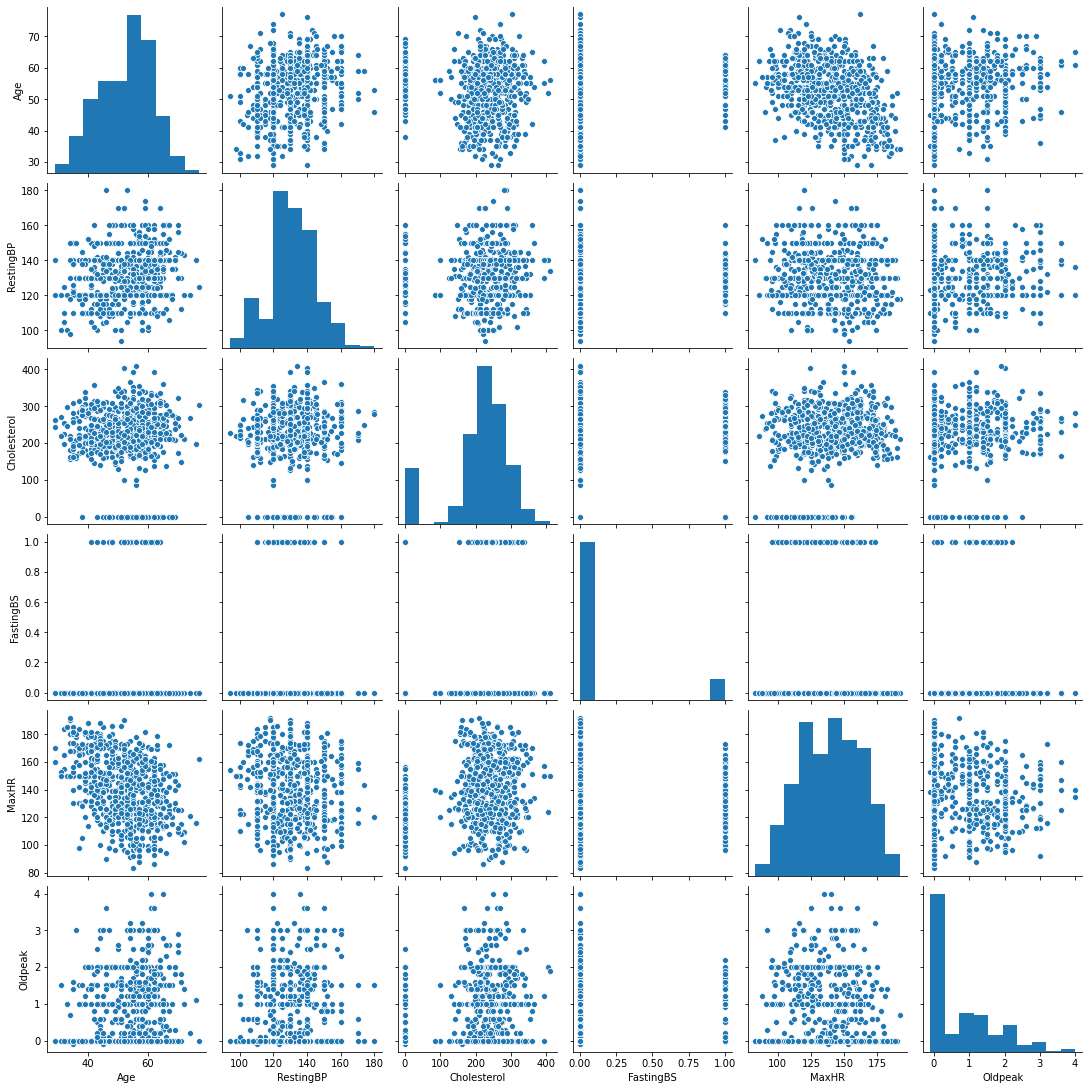

In [64]:
sns.pairplot(X_wout_outl)
plt.show()

In [65]:
idx_ucz, idx_test = sklearn.model_selection.train_test_split(np.arange(X_wout_outl.shape[0]),
                                                             test_size=0.2,
                                                             random_state=12345)
X_ucz_wo, X_test_wo = X_wout_outl.iloc[idx_ucz, :], X_wout_outl.iloc[idx_test, :]
yk_ucz_wo, yk_test_wo = yk_wout_outl[idx_ucz], yk_wout_outl[idx_test]
X_ucz_wo.shape, X_test_wo.shape, yk_ucz_wo.shape, yk_test_wo.shape

((560, 6), (141, 6), (560,), (141,))

In [66]:
X_test_std

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
736,0.051853,-0.561544,0.797194,-0.551041,-0.817325,2.168293
426,0.263883,-0.345493,-0.299857,-0.551041,0.125318,-0.831979
687,1.748095,1.274889,0.422369,-0.551041,0.243148,-0.831979
632,-0.054162,0.410685,0.038401,1.812770,0.714469,2.074534
675,0.369898,0.950812,-0.665540,1.812770,1.421452,-0.644462
...,...,...,...,...,...,...
68,-0.160178,1.490940,0.431511,-0.551041,-2.152736,2.918360
442,-0.266193,-0.237468,-1.817444,1.812770,-0.463834,0.293123
551,0.899974,-0.669570,0.193816,-0.551041,-1.995628,-0.831979
597,0.157868,0.032596,-0.126157,-0.551041,-0.031789,-0.644462


In [67]:
tab_train = list()
tab_test = list()

for i in range(1,31):
    klasyfikator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #tworzenie modelu
    print(klasyfikator)
    klasyfikator.fit(X_ucz_std, yk_ucz) #trenowanie modelu
    
    Y_tr_pred = klasyfikator.predict(X_ucz_std)
    Y_pred = klasyfikator.predict(X_test_std) #klasyfikacja zmiennej celu dla zbioru testowego
    
    tab_train.append(sklearn.metrics.f1_score(yk_ucz, Y_tr_pred))
    tab_test.append(sklearn.metrics.f1_score(yk_test, Y_pred))

KNeighborsClassifier(n_neighbors=1)
KNeighborsClassifier(n_neighbors=2)
KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier()
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(n_neighbors=7)
KNeighborsClassifier(n_neighbors=8)
KNeighborsClassifier(n_neighbors=9)
KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier(n_neighbors=11)
KNeighborsClassifier(n_neighbors=12)
KNeighborsClassifier(n_neighbors=13)
KNeighborsClassifier(n_neighbors=14)
KNeighborsClassifier(n_neighbors=15)
KNeighborsClassifier(n_neighbors=16)
KNeighborsClassifier(n_neighbors=17)
KNeighborsClassifier(n_neighbors=18)
KNeighborsClassifier(n_neighbors=19)
KNeighborsClassifier(n_neighbors=20)
KNeighborsClassifier(n_neighbors=21)
KNeighborsClassifier(n_neighbors=22)
KNeighborsClassifier(n_neighbors=23)
KNeighborsClassifier(n_neighbors=24)
KNeighborsClassifier(n_neighbors=25)
KNeighborsClassifier(n_neighbors=26)
KNeighborsClassifier(n_neighbors=27)
KNeighborsClassifier(n_

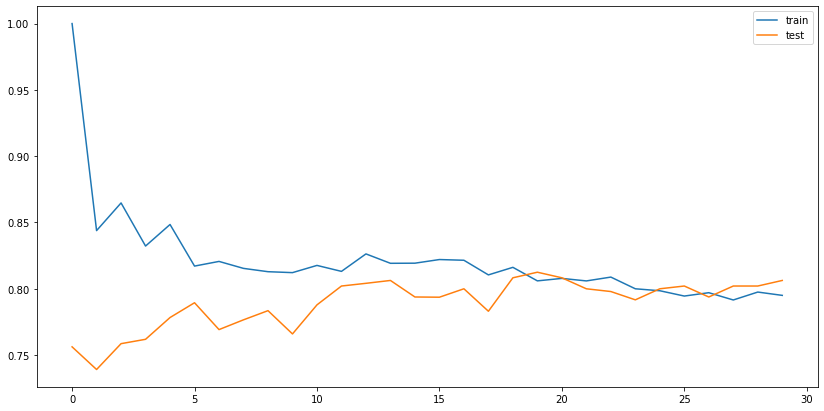

In [68]:
#poniżej wynik działania pętli od n=1 do wybranej maksymalnej liczby 30 sąsiadów
plt.figure(figsize=(14,7))
plt.plot(tab_train, label='train')
plt.plot(tab_test, label='test')
plt.legend()
plt.show()

In [69]:
#czyli widzimy, że najlepsze wyniki przy liczbie 26 sąsiadów (n_neighbors=26)
#między 17, a 26 się przecinają w różnych punktach
#potem się rozchodzą na stałe, czyli model już się nie uczy

params.append("knn26")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(n_neighbors=26),
                          X_ucz, X_test, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [70]:
df_results

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325
knn26,0.728261,0.824742,0.707965,0.761905


In [71]:
#sprawdzamy wyniki dla danych po standaryzacji
params.append("knn26_std")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(n_neighbors=26),
                          X_ucz_std, X_test_std, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [72]:
df_results

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325
knn26,0.728261,0.824742,0.707965,0.761905
knn26_std,0.793478,0.793814,0.810526,0.802083


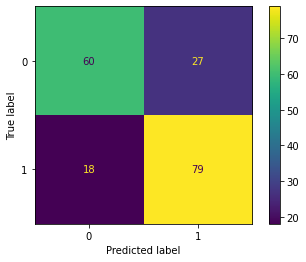

In [73]:
#mieliśmy macierz pomyłek na knn
knn.fit(X_ucz_std, yk_ucz)
knn.predict(X_test_std)

plot_confusion_matrix(knn, X_test_std, yk_test)
plt.show()

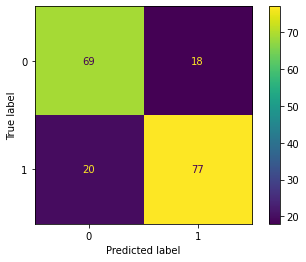

In [74]:
#teraz na knn26
knn26 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=26)
knn26.fit(X_ucz_std, yk_ucz)
knn26.predict(X_test_std)

plot_confusion_matrix(knn26, X_test_std, yk_test)
plt.show()
#widzimy na knn26 mniej błędów 1 i 2 rodzaju niż w knn

In [75]:
#na koniec sprawdzimy jeszcze drzewa decyzyjne i lasy losowe
import sklearn.tree

In [76]:
#drzewa decyzyjne (bez określonej maksymalnej głębokości)
params.append("dt")
res.append(fit_classifier(sklearn.tree.DecisionTreeClassifier(),
                          X_ucz, X_test, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [77]:
df_results

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325
knn26,0.728261,0.824742,0.707965,0.761905
knn26_std,0.793478,0.793814,0.810526,0.802083
dt,0.690217,0.742268,0.692308,0.716418


In [78]:
moje_drzewo = sklearn.tree.DecisionTreeClassifier()
#parametry algorytmu
moje_drzewo.fit(X_ucz, yk_ucz)

DecisionTreeClassifier()

In [79]:
moje_drzewo.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [80]:
#sprawdźmy głębokość drzewa 
moje_drzewo.get_depth()

15

In [81]:
#czyli domyślna głębokość drzewa wyszła 23 
#weźmy konkretną głębokość drzewa 12
params.append("dt_maxd12")
res.append(fit_classifier(sklearn.tree.DecisionTreeClassifier(max_depth=12),
                          X_ucz, X_test, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [82]:
df_results
#poniżej widzimy, że przy nie określonym max_depth wyniki słabe,
#ale przy głębokości drzewa max_depth=12 już lepsze

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325
knn26,0.728261,0.824742,0.707965,0.761905
knn26_std,0.793478,0.793814,0.810526,0.802083
dt,0.690217,0.742268,0.692308,0.716418
dt_maxd12,0.695652,0.762887,0.691589,0.725490


In [83]:
#sprawdzamy wyniki dla danych po standaryzacji
params.append("dt_maxd12_std")
res.append(fit_classifier(sklearn.tree.DecisionTreeClassifier(max_depth=12),
                          X_ucz_std, X_test_std, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [84]:
df_results

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325
knn26,0.728261,0.824742,0.707965,0.761905
knn26_std,0.793478,0.793814,0.810526,0.802083
dt,0.690217,0.742268,0.692308,0.716418
dt_maxd12,0.695652,0.762887,0.691589,0.725490
dt_maxd12_std,0.701087,0.752577,0.701923,0.726368


In [85]:
#czyli na drzewach decyzyjnych, również z ustaloną głębokością max_depth=12
#wyniki gorsze niż na metodzie k-najbliższych sąsiadów (26 sąsiadów)

In [86]:
#lasy losowe
import sklearn.ensemble

In [87]:
params.append("rf")
res.append(fit_classifier(sklearn.ensemble.RandomForestClassifier(random_state=12345),
                          X_ucz, X_test, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [88]:
df_results

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325
knn26,0.728261,0.824742,0.707965,0.761905
knn26_std,0.793478,0.793814,0.810526,0.802083
dt,0.690217,0.742268,0.692308,0.716418
dt_maxd12,0.695652,0.762887,0.691589,0.725490
dt_maxd12_std,0.701087,0.752577,0.701923,0.726368
rf,0.782609,0.855670,0.761468,0.805825


In [89]:
import sklearn.ensemble
las = sklearn.ensemble.RandomForestClassifier(random_state=12345)
#parametry algorytmu
las.fit(X_ucz, yk_ucz)

RandomForestClassifier(random_state=12345)

In [90]:
#przy ustalonej głębokości max_depth=12
params.append("rf_maxd12_oob")
res.append(fit_classifier(sklearn.ensemble.RandomForestClassifier(max_depth=12,
                                                                  oob_score=True,
                                                                  random_state=12345),
                          X_ucz, X_test, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [91]:
df_results

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325
knn26,0.728261,0.824742,0.707965,0.761905
knn26_std,0.793478,0.793814,0.810526,0.802083
dt,0.690217,0.742268,0.692308,0.716418
dt_maxd12,0.695652,0.762887,0.691589,0.725490
dt_maxd12_std,0.701087,0.752577,0.701923,0.726368
rf,0.782609,0.855670,0.761468,0.805825
rf_maxd12_oob,0.771739,0.855670,0.747748,0.798077


In [92]:
#po standardyzacji
params.append("rf_maxd12_oob_std")
res.append(fit_classifier(sklearn.ensemble.RandomForestClassifier(max_depth=12,
                                                                  oob_score=True,
                                                                  random_state=12345),
                          X_ucz_std, X_test_std, yk_ucz, yk_test))
df_results = pd.DataFrame(res, index=params)

In [93]:
df_results
#czyli na lasach losowych (też z max_depth=12) również wyniki lepsze
#niż na metodzie k-najbliższych sąsiadów (26 sąsiadów)

,ACC,P,R,F1
knn,0.728261,0.845361,0.700855,0.766355
knn_std,0.755435,0.814433,0.745283,0.778325
knn26,0.728261,0.824742,0.707965,0.761905
knn26_std,0.793478,0.793814,0.810526,0.802083
dt,0.690217,0.742268,0.692308,0.716418
dt_maxd12,0.695652,0.762887,0.691589,0.725490
dt_maxd12_std,0.701087,0.752577,0.701923,0.726368
rf,0.782609,0.855670,0.761468,0.805825
rf_maxd12_oob,0.771739,0.855670,0.747748,0.798077
rf_maxd12_oob_std,0.777174,0.855670,0.754545,0.801932


###  Wniosek końcowy:
Na pobranych danych analizowanych za pomocą 3 metod optymalne wyniki otrzymaliśmy chyba na metodzie lasów losowych.
Ale mogą odbiegać od rzeczywistości, gdyż wybrałem jedynie kilka z podanych kolumn.

Jeśli je dobrze zinterpretowałem.